## Modelos lineales para regresión

El modelo más sencillo es la regresión lineal o mínimos cuadrados: $$\min_w \sum_{i=1}^n{(y_i - (w_0 + w_1x_1 + w_2x_2 + \dots + w_dx_d))^2}$$

Guía de usuario: [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)    
Documentación: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas as pd
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

In [3]:
data.corr()['MEDV'].abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

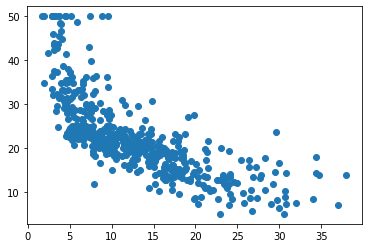

In [4]:
import matplotlib.pyplot as plt

x = data[['LSTAT']]
y = data['MEDV']

plt.scatter(x, y);

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(x, y)

beta = lm.coef_
beta0 = lm.intercept_

ypred = beta * x + beta0

print('Beta: ', beta)
print('Beta_0: ', beta0)
print('R^2 score: {}'.format(lm.score(x,  y)))

Beta:  [-0.95004935]
Beta_0:  34.55384087938311
R^2 score: 0.5441462975864799


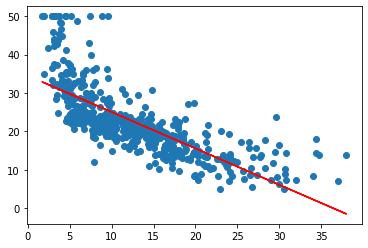

In [6]:
plt.scatter(x, y)
plt.plot(x, ypred, 'r');

In [7]:
import numpy as np

np.mean((y.values - ypred.values)**2)

130.3561450824369

In [8]:
X = data.drop(columns='MEDV')
y = data['MEDV']

lm = LinearRegression()
lm.fit(X, y)
ypred = lm.predict(X)
lm.score(X, y)

0.7406426641094095

In [9]:
np.mean((y - ypred)**2)

21.894831181729202

### Métricas de regressión

Por defecto, scikit-learn devuelve el coeficiente de determinación $R^2$. Este coeficiente representa la proporción de varianza de la variable $y$ que se puede predecir del resto de variables:

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n}{(y_i - \hat{y}_i)^2}}{\sum_{i=1}^{n}{(y_i - \bar{y}_i)^2}}$$

donde $\bar{y} = \frac{1}{n}\sum_{i=1}^{n}{y_i}$. Toma valores entre $0$ y $1$ (en general cuanto más alto mejor).

scikit-learn también incluye otras métricas comunes en su módulo `metrics`. Para regresión tenemos:

  * Error cuadrático medio o *mean squared error* (MSE) $$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y}_i)^2}$$

  * Error absoluto medio o *mean absolute error* (MAE) $$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}{|y_i - \hat{y}_i|}$$


* Documentación: [metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)
* Guía usuario: [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y, ypred)

21.894831181729202

In [11]:
mean_absolute_error(y, ypred)

3.270862810900317

### Regularización

En la práctica es muy común añadir un término de regularización a la función que se optimiza: $$\min_f\;\sum_{i=1}^{n}{L(f(x_i), y_i)} + \lambda R(f)$$

Generalmente este término se usa para:

   * reducir la complejidad del modelo y evitar el sobreajuste
   * inducir propiedades en los coeficientes, como por ejemplo dispersión (muchos coeficientes iguales a 0)
   
#### Regresión ridge

Función de pérdida de mínimos cuadrados + regularización $l_2$:

   $$\min_w \sum_{i=1}^{n}{(y_i - w^Tx_i)} + \alpha \sum_{i=1}^{d}{w_j}^2$$
   
Hace que el valor de los coeficientes se reduzca, lo que simplifica el modelo (un coeficiente con un valor muy alto hace que pequeños cambios en esa variable cambien mucho la predicción del modelo)

 Documentación [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [12]:
from sklearn.linear_model import LinearRegression, Ridge

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)
mean_squared_error(y_test, lm.predict(X_test))

3180.1988368427274

In [15]:
rr = Ridge()
rr.fit(X_train, y_train)
mean_squared_error(y_test, rr.predict(X_test))

3192.3285539937624

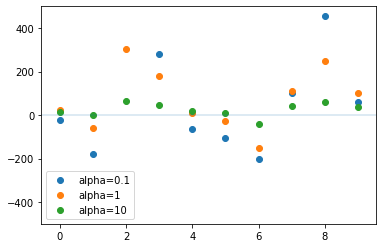

In [16]:
rr01 = Ridge(alpha=0.1)
rr100 = Ridge(alpha=10)
rr01.fit(X_train, y_train)
rr100.fit(X_train, y_train)

plt.scatter(range(X_train.shape[1]), rr01.coef_,label='alpha=0.1')
plt.scatter(range(X_train.shape[1]), rr.coef_, label='alpha=1')
plt.scatter(range(X_train.shape[1]), rr100.coef_, label='alpha=10')
plt.axhline(alpha=0.2)
plt.ylim((-500, 500))
plt.legend();

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-3, 3, 14)}
param_grid

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
        7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
        4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
        3.45510729e+02, 1.00000000e+03])}

In [18]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

In [19]:
res = pd.DataFrame(grid.cv_results_)

In [20]:
grid.best_params_

{'alpha': 0.07017038286703829}

In [21]:
mean_squared_error(y_test, grid.predict(X_test))

3151.7249978465775

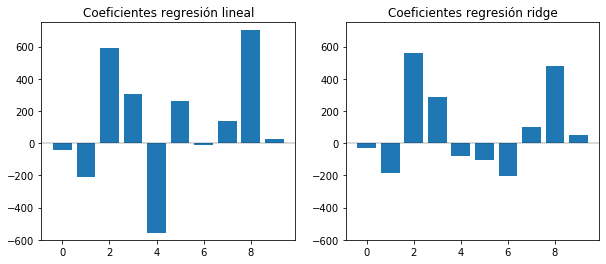

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.bar(range(X_train.shape[1]), lm.coef_)
ax1.axhline(color='black', alpha=.2);
ax1.set_title('Coeficientes regresión lineal')
ax1.set_ylim((-600, 750))

ax2.bar(range(X_train.shape[1]), grid.best_estimator_.coef_)
ax2.axhline(color='black', alpha=.2);
ax2.set_title('Coeficientes regresión ridge')
ax2.set_ylim((-600, 750));

Algunos estimadores tienen versiones específicas que realizan la búsqueda de parámetros automáticamente usando validación cruzada.

Se recomienda usar siempre estas versiones, ya que están optimizadas para el estimador en concreto. Por ejemplo para regresión ridge existe la clase `RidgeCV`

In [23]:
from sklearn.linear_model import RidgeCV

cv = RidgeCV(alphas=np.logspace(-3, 3, 14))
cv.fit(X_train, y_train)
cv.alpha_

0.07017038286703829

### Lasso

Función de pérdida de mínimos cuadrados + regularización $l_1$:

   $$\min_w \sum_{i=1}^{n}{(y_i - w^Tx_i)} + \alpha \sum_{i=1}^{d}{|w_j|}$$
   
Hace que el valor de los coeficientes se reduzca, lo que simplifica el modelo (un coeficiente con un valor muy alto hace que pequeños cambios en esa variable cambien mucho la predicción del modelo).

Además, hace que muchos coeficientes sean exactamente igual a **0**, lo que no ocurre con la regresión ridge. Sin un coeficiente es 0 no tiene ninguna **influencia** en el modelo, es como si hubiéramos descartado esa variable (selección de variables automática!)

In [24]:
from sklearn.linear_model import Lasso, LassoCV

In [25]:
lc = LassoCV()
lc.fit(X_train, y_train)
lc.coef_

array([  -0.        , -145.65324703,  593.20825581,  250.85271953,
       -115.46708591,   -0.        , -204.84019441,    0.        ,
        542.5146258 ,    0.        ])

In [26]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

res = {}
for alpha in lc.alphas_:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    res[alpha] = {'%_not_zero': np.mean(model.coef_ != 0),
                  'mean_cv_train': np.mean(cross_val_score(model, X_train, y_train, cv=10)),
                  'mean_cv_test': np.mean(cross_val_score(model, X_test, y_test, cv=10))}

In [27]:
df = pd.DataFrame.from_dict(res, orient='index')
df.head()

,%_not_zero,mean_cv_train,mean_cv_test
2.404546,0.0,-0.006217,-0.089892
2.242488,0.1,0.035255,-0.089892
2.091351,0.2,0.086075,-0.089892
1.950401,0.2,0.137744,-0.089892
1.818951,0.2,0.184713,-0.089892


In [28]:
df['mean_cv_test'].idxmin()

1.5820306244414268

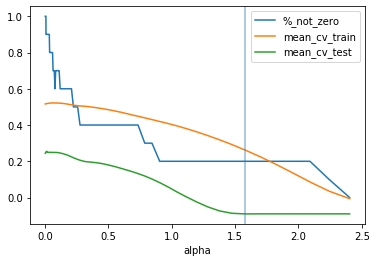

In [29]:
df.plot();
plt.axvline(df['mean_cv_test'].idxmin(), alpha=0.5)
plt.xlabel('alpha');

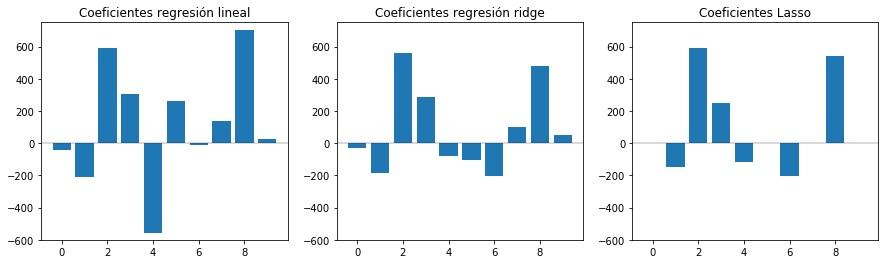

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.bar(range(X_train.shape[1]), lm.coef_)
ax1.axhline(color='black', alpha=.2);
ax1.set_title('Coeficientes regresión lineal')
ax1.set_ylim((-600, 750))

ax2.bar(range(X_train.shape[1]), cv.coef_)
ax2.axhline(color='black', alpha=.2);
ax2.set_title('Coeficientes regresión ridge')
ax2.set_ylim((-600, 750));

ax3.bar(range(X_train.shape[1]), lc.coef_)
ax3.axhline(color='black', alpha=.2);
ax3.set_title('Coeficientes Lasso')
ax3.set_ylim((-600, 750));

### Elastic Net

Es solo un nombre "elegante" para un modelo de regresión lineal + regularización $l_1$ + regularización $l_2$:

$$\min_w \sum_{i=1}^{n}{(y_i - w^Tx_i)} + \alpha_1 \sum_{i=1}^{d}{|w_j|} + \alpha_2 \sum_{i=1}^{d}{w_j^2}$$

En scikit-learn está parametrizado de una forma ligeramente distinta 

$$\min_w \sum_{i=1}^{n}{(y_i - w^Tx_i)} + \alpha\left(\lambda \sum_{i=1}^{d}{|w_j|} + (1-\lambda) \sum_{i=1}^{d}{w_j^2}\right)$$

De esta forma $\lambda$ (`l1_ratio` en scikit) toma valores entre 0 y 1 y representa la cantidad de penalización $l_1$:

  * `l1_ratio` = 0, Lasso
  * `l1_ratio` = 1, Ridge
  * 0 < `l1_ratio` < 1, Elastic Net
  
Por tanto **nunca** usar la clase `ElasticNet` con `l1_ratio` = 0 o `l1_ratio` = 1 (por defecto vale 0.5)

Documentación: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

In [31]:
from sklearn.linear_model import ElasticNetCV

en = ElasticNetCV(l1_ratio=np.linspace(0.05, 0.95, num=10), alphas=np.logspace(-2.7, 1.68, num=20))
en.fit(X_train, y_train)
print(en.alpha_)
print(en.l1_ratio_)

0.005768363651994374
0.95


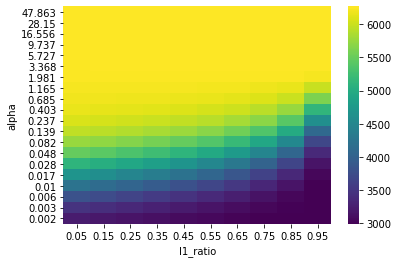

In [32]:
import seaborn as sns

res = pd.DataFrame(en.mse_path_.mean(axis=2).T, 
                   columns=pd.Index(np.linspace(0.05, 0.95, num=10).round(3), name='l1_ratio'),
                   index=pd.Index(np.logspace(-2.7, 1.68, num=20).round(3)[::-1], name='alpha'))

sns.heatmap(res, cmap='viridis');

### Ejercicios

#### Ejercicio 1

Ajusta un modelo de regresión lineal sobre el conjunto de datos `triazines` (disponible a través de la función `fetch_openml`): 

   1. Divide los datos en entrenamiento y test
   
   2. Calcula el coeficiente $R^2$ y el error cuadrático medio sobre entrenamiento y test

#### Ejercicio 2

Recrear esta gráfica con el conjunto de datos `triazines` con el modelo de regresión ridge

<img src=https://amueller.github.io/ml-workshop-2-of-4/slides/images/ridge_alpha_triazine.png width=500>


#### Ejercicio 3

Ajusta ahora un modelo Lasso y Elastic Net sobre los mismos datos seleccionando el valor óptimo de los parámetros `alpha` y `l1_ratio`. ¿Cuántos coeficientes son 0 para cada uno de los modelos?

In [10]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('triazines', version=1, return_X_y=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99], normalize=True)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/home/alberto/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022476777578472884, tolerance: 0.00022249270990990988
  tol, rng, random, positive)


0.09320679190235015

In [17]:
mean_squared_error(y_test, lr.predict(X_test))

0.024371152417578614

In [18]:
lr.l1_ratio_

0.95

In [19]:
lr.alpha_

0.0007716662033609708

In [22]:
(lr.coef_ == 0).sum()

47

In [24]:
len(lr.coef_)

60